# COVID-19 plots
The purpose of this notebook is to plot the progression of COVID-19 cases based upon the New York Times' daily updated database. See https://github.com/nytimes/covid-19-data for more details on that database. Note data are stored by state and by county. Plots are linear-log, in order to capture the exponential growth of COVID-19, and perhaps more easily visualize when this growth is no longer exponential. 

Kirk Knobelspiesse, knobelspiesse@gmail.com

## Setup

In [33]:
import numpy as np
import pandas as pd
print('Using pandas version ',pd.__version__)
%matplotlib inline

# Only 10 rows of data will be displayed
pd.set_option("max_rows", 10) 

# Print floating point numbers using fixed point notation
np.set_printoptions(suppress=True)

# Set figure size
LARGE_FIGSIZE = (8, 6)
#from seaborn import set_style
#set_style("darkgrid")
import seaborn as sns
sns.set(style='ticks', context='talk')
import matplotlib.pyplot as plt
from datetime import datetime

Using pandas version  0.25.3


## Get data

In [34]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/"
filename_states = "us-states.csv"
filename_counties="us-counties.csv"
stt = pd.read_csv(url+filename_states, skiprows=2, names=["date","state","fips","cases","deaths"])
cyt = pd.read_csv(url+filename_counties, skiprows=2, names=["date","county","state","fips","cases","deaths"])


In [35]:
cyt

,date,county,state,fips,cases,deaths
0,2020-01-22,Snohomish,Washington,53061.0,1,0
1,2020-01-23,Snohomish,Washington,53061.0,1,0
2,2020-01-24,Cook,Illinois,17031.0,1,0
3,2020-01-24,Snohomish,Washington,53061.0,1,0
4,2020-01-25,Orange,California,6059.0,1,0
...,...,...,...,...,...,...
67450,2020-04-17,Sublette,Wyoming,56035.0,1,0
67451,2020-04-17,Sweetwater,Wyoming,56037.0,10,0
67452,2020-04-17,Teton,Wyoming,56039.0,61,0
67453,2020-04-17,Uinta,Wyoming,56041.0,6,0


/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


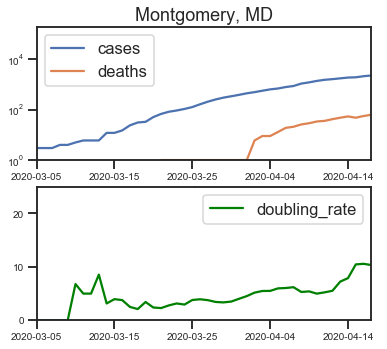

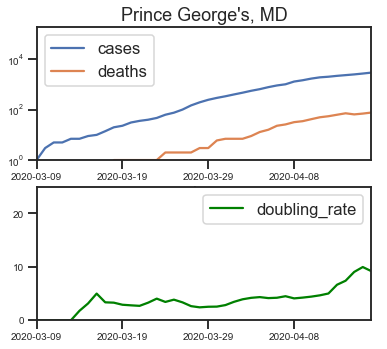

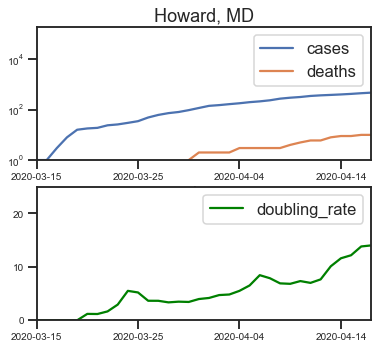

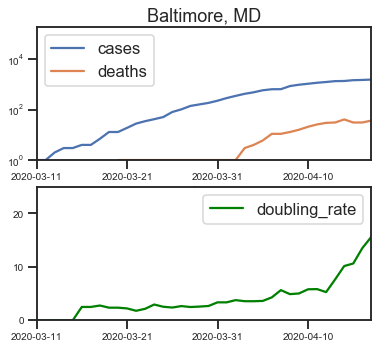

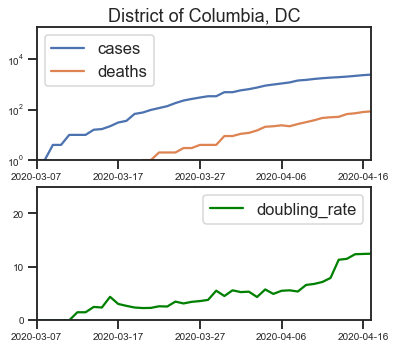

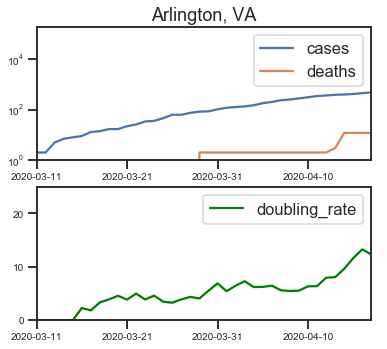

TypeError: no numeric data to plot

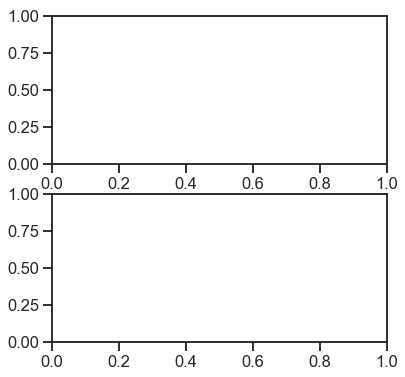

In [40]:
this_county=["Montgomery","Prince George's","Howard","Baltimore","District of Columbia","Arlington","Fairfax",\
            "Lane","Beaufort","New York City"]
this_state=["Maryland","Maryland","Maryland","Maryland","District of Columbia","Virginia","Virginia"\
            "Oregon", "North Carolina","New York"]
this_state_short=["MD","MD","MD","MD","DC","VA","VA","OR","NC","NY"]



yr=[1,200000]
fs=10
days_passed=5

for i in range(0,len(this_state)):
    this=cyt[(cyt.state==this_state[i]) & (cyt.county==this_county[i])]
    tt=this.cases.to_numpy(copy=True)
    r_tt=np.roll(tt,days_passed)
    doubling_rate= (days_passed*np.log(2.))/(np.log(tt/r_tt))
    doubling_rate[np.argwhere(doubling_rate<0)]=0
    this['doubling_rate']=doubling_rate
    
    fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(6,6))
    this_name=this_county[i]+", "+this_state_short[i]
    this.plot('date',['cases','deaths'],kind = 'line',title=this_name,
              fontsize=fs,logy=True,ylim=yr,ax=axes[0])
    this.plot('date','doubling_rate',kind = 'line',color='green',
          fontsize=fs,logy=False,ylim=[0,25],ax=axes[1])
    this_savename="CV19_county_"+this_county[i].replace(" ", "")+".pdf"
    plt.subplots_adjust(bottom=0.2)
    plt.xlabel("")
    plt.savefig(this_savename)
    plt.show()
    plt.close()
    
    

/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


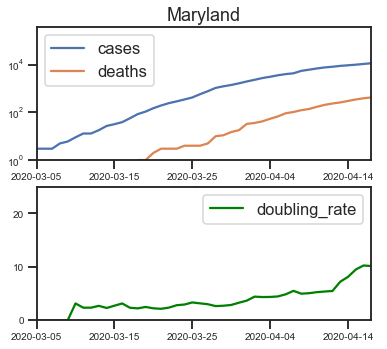

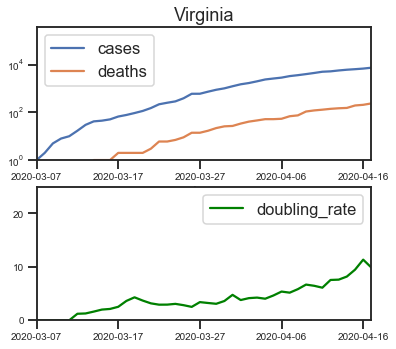

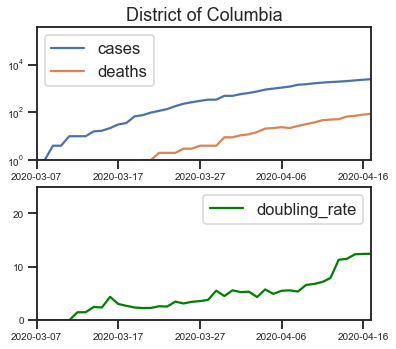

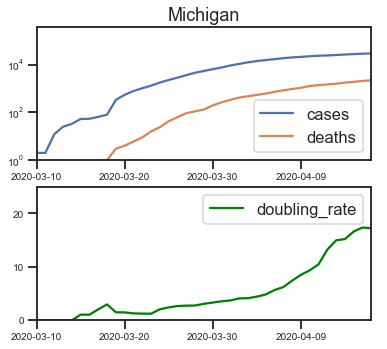

/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


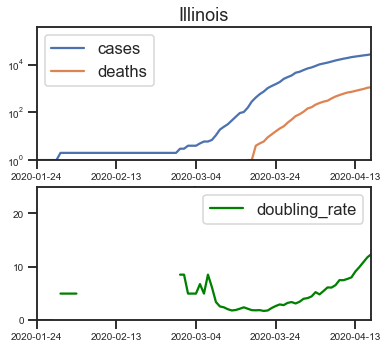

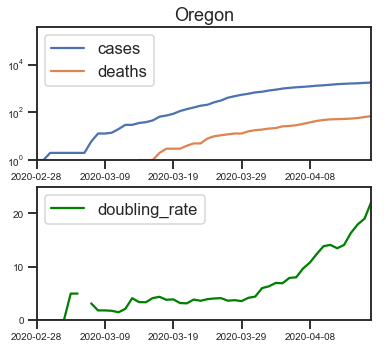

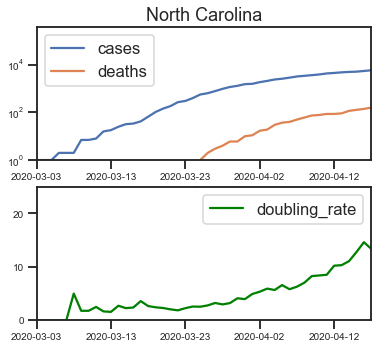

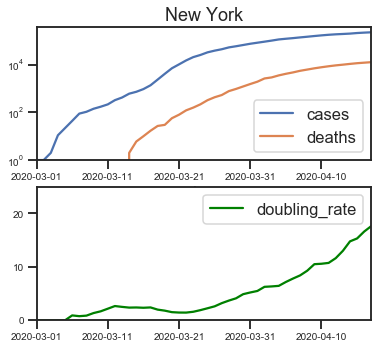

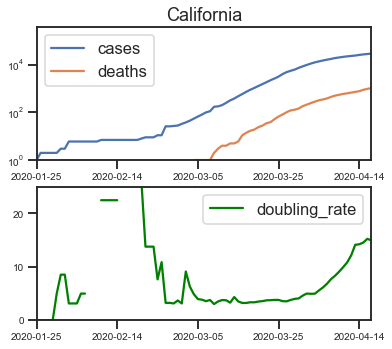

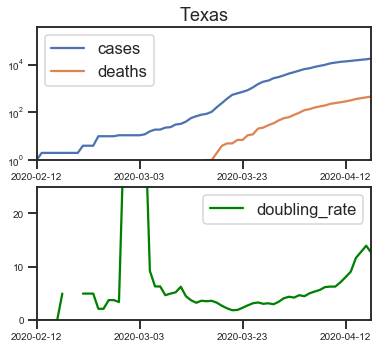

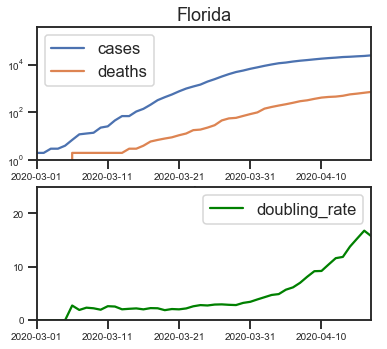

In [42]:

this_state=["Maryland","Virginia","District of Columbia","Michigan","Illinois",\
            "Oregon", "North Carolina","New York","California","Texas","Florida"]


#fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(16,10))
yr=[1,400000]
fs=10
days_passed=5

for i in range(0,len(this_state)):
    this=stt[stt.state==this_state[i]]
    tt=this.cases.to_numpy(copy=True)
    r_tt=np.roll(tt,days_passed)
    doubling_rate= (days_passed*np.log(2.))/(np.log(tt/r_tt))
    doubling_rate[np.argwhere(doubling_rate<0)]=0
    this['doubling_rate']=doubling_rate
    fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(6,6))
    this.plot('date',['cases','deaths'],kind = 'line',title=this_state[i],
              fontsize=fs,logy=True,ylim=yr,ax=axes[0])
    this.plot('date','doubling_rate',kind = 'line',color='green',
          fontsize=fs,logy=False,ylim=[0,25],ax=axes[1])
    this_savename="CV19_state_"+this_state[i].replace(" ", "")+".pdf"
    plt.subplots_adjust(bottom=0.2)
    plt.xlabel("")
    plt.savefig(this_savename)
    plt.show()
    plt.close()
    
    